In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

In [2]:
df = pd.read_csv("Dataset.csv")
df1 = pd.read_csv("Classes.csv")
del df['Win']
datasetColumn = df.columns.values

In [3]:
datasetColumn

array(['Priority', 'Unix TimeStamp', 'Source port', 'Destination port',
       'Protocol', 'TTL', 'TOS', 'Datagram Length', 'A', 'P', 'R', 'S',
       'F', 'TCP length', 'TCP options'], dtype=object)

In [4]:
Class = df1['Class']
df = df.join(Class)

In [5]:
corr = df[df.columns].corr()['Class'][:].abs()
corr.sort_values(ascending = False)

Class               1.000000
Priority            0.862247
R                   0.371830
Protocol            0.291782
Destination port    0.288368
A                   0.264573
F                   0.215099
TOS                 0.212674
P                   0.165469
Source port         0.159474
Unix TimeStamp      0.135101
TCP options         0.129982
TCP length          0.123938
S                   0.031568
Datagram Length     0.024056
TTL                 0.012675
Name: Class, dtype: float64

In [6]:
#plt.scatter(x = df["Destination port"],y = df["A"],color = "blue")
#x = df["TCP length"]
#y = df["A"]

In [7]:
X = df[['Destination port' ,'A']].iloc[: , :].values

In [8]:
m=X.shape[0]
n=X.shape[1] 
n_iter=100

In [9]:
K=2 # number of clusters

In [10]:
Centroids=np.array([]).reshape(n,0) 


In [11]:
for i in range(K):
    rand=random.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

In [12]:
Output={}


In [13]:
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

In [14]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

C:\Users\Mona\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Mona\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [23]:
for i in range(n_iter):
     #step 2.a
        EuclidianDistance=np.array([]).reshape(m,0)
        for k in range(K):
            tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
            EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
        Y={}
        for k in range(K):
            Y[k+1]=np.array([]).reshape(2,0)
        for i in range(m):
            Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
        for k in range(K):
            Y[k+1]=Y[k+1].T
    
        for k in range(K):
            Centroids[:,k]=np.mean(Y[k+1],axis=0)
Output=Y


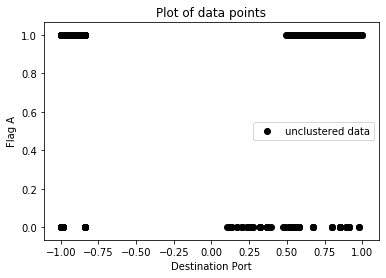

In [16]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Destination Port')
plt.ylabel('Flag A')
plt.legend()
plt.title('Plot of data points')
plt.show()

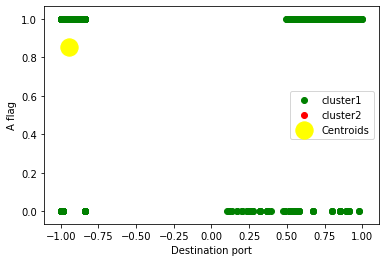

In [22]:
color=['green','red']
labels=['cluster1','cluster2']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Destination port')
plt.ylabel('A flag')
plt.legend()
plt.show()

In [18]:
class_0 = df[df['Class']==0]
class_1 = df[df['Class']==1]

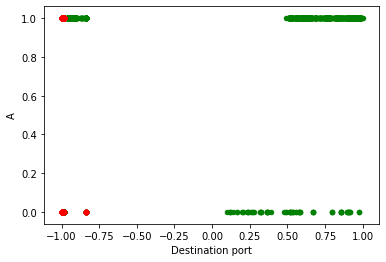

In [19]:
ax1 = class_0.plot(kind='scatter', x='Destination port', y='A', color='g')    
ax2 = class_1.plot(kind='scatter', x='Destination port', y='A', color='r',ax=ax1)    